## 다중선형회귀분석

#### 다중 선형 회귀계수의 추정

- 단순 선형 회귀 분석
    - 변수가 1개인 경우
    - $\hat{Y}=\hat\beta_0 + \hat\beta_1X$


- 다중 선형 회귀 분석 
    - 변수가 여러개인 경우
    - $\hat{Y}=\hat\beta_0 + \hat\beta_1X_1 + \hat\beta_2X_2 + ... + \hat\beta_nX_n$
    - 잔차의 제곱
        - $SSE = \sum_{i=1}^ne_i^2 = e_1^2 + e_2^2 + ... + e_n^2$

각 변수에 대해 편미분하여 수식으로 표현

$$ y_1 = \beta_0 + \beta_1x_{11} + \beta_2x_{12} + ... + \beta_kx_{1k} + \varepsilon_1$$
$$ y_2 = \beta_0 + \beta_1x_{21} + \beta_2x_{22} + ... + \beta_kx_{2k} + \varepsilon_2$$
$$ \vdots $$ 
$$ y_n = \beta_0 + \beta_1x_{n1} + \beta_2x_{n2} + ... + \beta_kx_{nk} + \varepsilon_n$$

행렬로 표현

$$
\begin{bmatrix}
y_1\\
y_2\\
\vdots\\
y_n\\
\end{bmatrix}
=
\begin{bmatrix}
1 x_{11} x_{12} ... x_{1k}\\
1 x_{21} x_{22} ... x_{2k}\\
\vdots\\
1 x_{n1} x_{n2} ... x_{nk}\\
\end{bmatrix}
\begin{bmatrix}
\beta_0\\
\beta_1\\
\vdots\\
\beta_k\\
\end{bmatrix}
+
\begin{bmatrix}
\varepsilon_0\\
\varepsilon_1\\
\vdots\\
\varepsilon_k\\
\end{bmatrix}
$$


$$y = X\beta + \varepsilon$$
$$\varepsilon=(\varepsilon_1, \varepsilon_2, ..., \varepsilon_n)'$$

최소제곱법을 구하기 위한 잔차 수식

$$\sum_{i=1}^n\varepsilon_i^2 = \varepsilon'\varepsilon = (y-X\beta)'(y-X\beta)$$
$$=y'y-2\beta'X'y+\beta'X'X\beta$$

최소제곱법을 구하기 위한 편미분 수식

$$\frac{\partial{L}}{\partial\beta} = 2X'X\beta-2X'y=0$$
$$\Rightarrow X'X\beta = X'y$$
$$\Rightarrow \beta = (X'X)^{-1}X'y$$

역행렬 구하는 방법
- $ad-bc$가 0이 되면 안되기때문에 다중공선성 문제를 해결해서 회귀분석을 수행해야합니다.
- 단순 선형회귀 분석과 다르게 다중 선형 회귀 분석은 다중공선성을 주의해야 합니다.
- feature의 상관관계가 높으면 역행렬이 구해지지 않습니다.

$$
A=
\begin{bmatrix}
a \quad b\\
c \quad d\\
\end{bmatrix}
$$

$$
A^{-1}=
\frac{1}{ad-bc}
\begin{bmatrix}
d \quad -b\\
-c\quad a\\
\end{bmatrix}
$$

#### 다중공선성(Multicollinearity) 문제
- 독립변수들이 강한 선형관계에 있을때 다중 공선성이 있다고 할수 있다.
- 종속변수를 설명하기 위한 독립변수가 매우 비슷한 영역을 설명하고 있다.
- 다중공선성이 있으면 잘못된 변수의 해석이나 예측의 정확도 하락의 결과를 가져올수 있다.
- 아래의 수식에서 $ad-bc$가 0이 나오면 문제를 풀수 없다.

$$
\begin{bmatrix}
1 \quad 2\\
2 \quad 4\\
\end{bmatrix}^{-1}
\begin{bmatrix}
3\\
5\\
\end{bmatrix}
=
\begin{bmatrix}
a\\
b\\
\end{bmatrix}
$$

$$
A^{-1}=
\frac{1}{ad-bc}
\begin{bmatrix}
d \quad -b\\
-c\quad a\\
\end{bmatrix}
$$

$$ad-bc = 0$$

- 역행렬을 구할수 없음 > 모델을 만들수 없음
- 역행렬을 구할수 있다고 하더라도 굉장히 작은 수가 나오면 추세선의 회귀계수가 작아져서 의미 없는 모델이 됨

In [1]:
%config InlineBackend.figure_formats = {'png', 'retina'}

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### 광고 데이터를 활용한 다중 선형회귀 분석

In [2]:
df = pd.read_csv("./data/advertising.csv")
df.tail(2)

,TV,radio,newspaper,sales
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


#### feature들의 다중공선성 확인 방법 1
- scatter plot을 그림

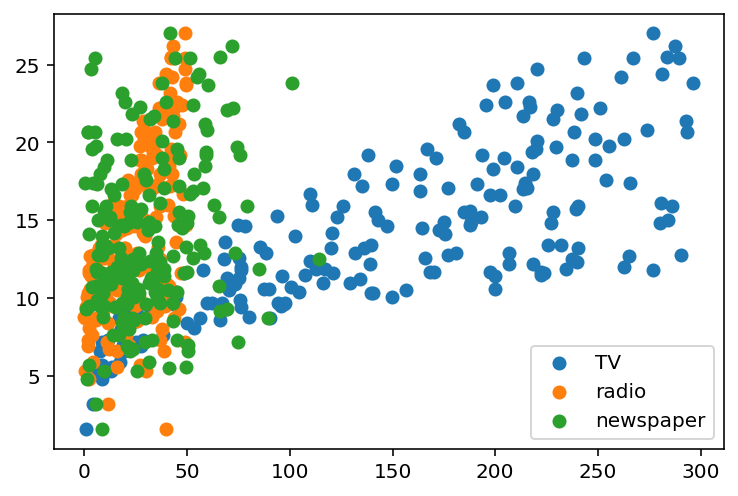

In [3]:
plt.scatter(df["TV"], df["sales"], label="TV")
plt.scatter(df["radio"], df["sales"], label="radio")
plt.scatter(df["newspaper"], df["sales"], label="newspaper")
plt.legend()
plt.show()

In [ ]:
# radio, newspaper가 tv에 비해서 상관계수가 높다는것을 확인

#### feature들의 다중공선성 확인 방법 2
- feature들 사이의 상관계수를 확인

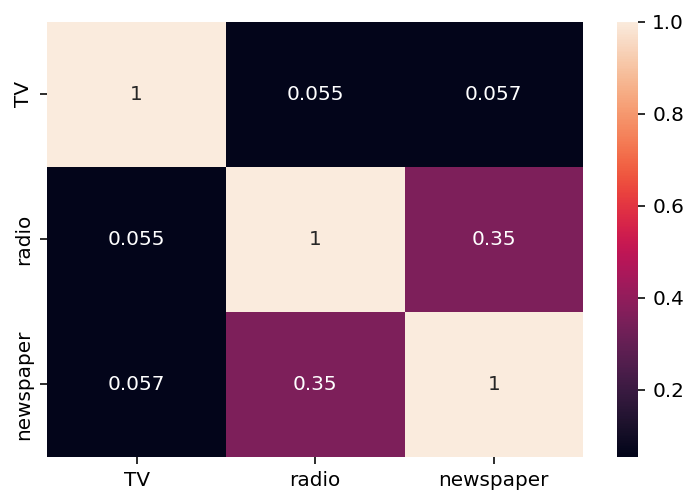

In [4]:
sns.heatmap(df.drop(columns=["sales"]).corr(), annot=True)
plt.show()

In [ ]:
# radio와 newspaper의 상관계수가 다른 feature들에 대한 상관계수보다 상대적으로 높다는것을 확인

#### feature들의 다중공선성 확인 방법 3
- VIF(Variance inflation factor)
    - 분산 팽창 요인
    - 변수들간의 correlation을 진단하는 방법
    - 특정 feature를 y값으로 설정하여 모델을 만들었을때 나오는 결정계수(r-squared)로 아래의 수식을 연산

$$VIF_i = \frac{1}{1-R_i^2}$$

- VIF가 10이상인 경우 다중공선성으로 판단(10이라는 수치가 절대적이진 않다)
- 결정계수가 $R_i^2$ 이 커질수록 VIF 지표가 커짐 > 다중공선성이 있는 factor로 판단


In [5]:
features_df = df.drop(columns=["sales"])
features_df.tail(2)

,TV,radio,newspaper
198,283.6,42.0,66.2
199,232.1,8.6,8.7


In [6]:
# VIF 지표 : 직접 연산

In [7]:
import statsmodels.api as sm

In [8]:
feature = features_df[["radio", "newspaper"]]
target = features_df["TV"]
model = sm.OLS(target, feature).fit()
1 / (1 - model.rsquared)

2.486771835198193

In [9]:
# VIF 지표 : 함수 사용

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [11]:
variance_inflation_factor(features_df.values, 0)

2.486771835198193

In [12]:
# 데이터 프레임으로 출력

In [13]:
pd.DataFrame({
    "VIF Factor": [variance_inflation_factor(features_df.values, idx) for idx in range(features_df.shape[1])],
    "features": features_df.columns,
})

,VIF Factor,features
0,2.486772,TV
1,3.285462,radio
2,3.055245,newspaper


In [14]:
# VIF 지표로는 빼야할 feature가 없는걸로 나옴 > 모든 지표가 절대적이지 않음

- 다중공선성 확인 방법 1, 2에서는 newspaper를 빼도 된다로 판단
- 다중공선성 확인 방법 3에서는 newspaper를 빼면 안된다로 판단
- 결과는 직접 요약표를 보고 판단 

#### 모델 생성해서 요약표로 확인

- 모든 feature 사용

In [15]:
feature_1 = sm.add_constant(df[["TV", "radio", "newspaper"]])
model_1 = sm.OLS(df["sales"], feature_1).fit()
print(model_1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.896   
Dependent Variable: sales            AIC:                780.3622
Date:               2022-05-25 16:13 BIC:                793.5555
No. Observations:   200              Log-Likelihood:     -386.18 
Df Model:           3                F-statistic:        570.3   
Df Residuals:       196              Prob (F-statistic): 1.58e-96
R-squared:          0.897            Scale:              2.8409  
------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
const           2.9389    0.3119   9.4223  0.0000   2.3238  3.5540
TV              0.0458    0.0014  32.8086  0.0000   0.0430  0.0485
radio           0.1885    0.0086  21.8935  0.0000   0.1715  0.2055
newspaper      -0.0010    0.0059  -0.1767  0.8599  -0.0126  0.0105
--------------------

In [16]:
# newspaper의 coef(회귀계수) 값이 너무 작으므로 모델에 거의 영향을 안 미침
# t-test 가 0에 가까우므로 newspaper의 회귀계수값에 대한 신뢰도가 낮음
# p-value 값이 0.05보다 한참 높으므로 newspaper의 회귀계수값에 대한 신뢰도가 낮음

- newspaper 제외

In [17]:
feature_2 = sm.add_constant(df[["TV", "radio"]])
model_2 = sm.OLS(df["sales"], feature_2).fit()
print(model_2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.896   
Dependent Variable: sales            AIC:                778.3941
Date:               2022-05-25 16:14 BIC:                788.2891
No. Observations:   200              Log-Likelihood:     -386.20 
Df Model:           2                F-statistic:        859.6   
Df Residuals:       197              Prob (F-statistic): 4.83e-98
R-squared:          0.897            Scale:              2.8270  
--------------------------------------------------------------------
         Coef.     Std.Err.       t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const    2.9211      0.2945     9.9192    0.0000    2.3403    3.5019
TV       0.0458      0.0014    32.9087    0.0000    0.0430    0.0485
radio    0.1880      0.0080    23.3824    0.0000    0.1721    0.2038
-----------------------------------------------------------------
Omnibus: 

In [ ]:
# newspaper를 제거해도 r-squared에 대한 값이 작아지지 않음 > newspaper를 추가하면 연산만 늘어날뿐

- 모델의 성능 평가 (MAE)
    - 데이터셋 분리하지 않음

In [18]:
from sklearn.metrics import mean_absolute_error

In [19]:
pred_1 = model_1.predict(feature_1)
pred_2 = model_2.predict(feature_2)

In [20]:
# 모든 feature 사용
np.round(mean_absolute_error(df["sales"], pred_1), 3)

1.252

In [21]:
# tv, radio 사용
np.round(mean_absolute_error(df["sales"], pred_2), 3)

1.254

In [ ]:
# > 모델의 성능에는 거의 차이가 없음

#### 결론
- 모든 변수를 넣고 학습하는것 보다 중요 변수를 넣고 학습하는것이 더 좋습니다.
    - 예측성능 및 학습속도 : 변수의 갯수가 작아질수록 수식이 간단해져 학습 및 예측 속도가 빨라짐
    - 활용도 : 변수의 갯수가 작을수록 데이터를 관리하기가 쉬워짐

#### 모형의 성능 지표


- MSE : Mean Squared Error
    - 작으면 작을수록 좋지만 과적합의 오류가 생길수 있음
    - $MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{f}(x_i))^2$
        - $n$ : 데이터의 갯수
        - $y_i$ : 실제 종속변수
        - $\hat{f}(x_i)$ : 예측한 종속변수
    - 결과로 나오는 수치가 모델이 어느정도로 좋은 지 알수 없음
    - 다른 모델과 비교할때 상대적으로 값이 낮으면 모델이 더 좋다만 확인 가능


- RMSE : Root Mean Square Error
    - $\sqrt{MSE}$


- MAE : Mean Absolute Error 
    - $MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{f}(x_i)|$
    - 잔차의 절대값을 확인할수 있음
    
    
- MAPE : Mean Absolute Percentage Error     
    - $MAPE = \frac{100}{n} \frac{\sum_{i=1}^{n}|{y_i - \hat{f}(x_i)}|}{\sum_{i=1}^n|y_i|} $
    - 0% ~ 100%의 값을 가져 0에 가까워질수록 모델의 성능이 좋다고 해석할수 있음

In [22]:
# 모든 feature 사용
mae_1 = mean_absolute_error(pred_1, df["sales"])
mape_1 = mae_1 / np.sum(df["sales"]) * 100

# tv, radio 사용
mae_2 = mean_absolute_error(pred_2, df["sales"])
mape_2 = mae_2 / np.sum(df["sales"]) * 100

np.round(mae_1, 4), np.round(mae_2, 4), np.round(mape_1, 5), np.round(mape_2, 5)

(1.252, 1.2537, 0.04464, 0.0447)